# ANU ASTR4004 2025 - Week 4 (12+14 August 2025): Outsourcing Code


Author: Dr Sven Buder (sven.buder@anu.edu.au)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#How-it-started" data-toc-modified-id="How-it-started-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>How it started</a></span></li><li><span><a href="#How-it's-going" data-toc-modified-id="How-it's-going-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How it's going</a></span></li></ul></div>

## How it started

1 file `spectrum_processor.py` with 55 lines

<div style="background-color: lightgrey; padding: 5px; border-radius: 2px;">

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function to read the spectrum
def read_spectrum(filename):
    data = np.loadtxt(filename)
    wavelength, flux = data[:, 0], data[:, 1]
    return wavelength, flux

# Function to normalize the spectrum
def normalize_spectrum(wavelength, flux):
    continuum = np.median(flux)  # Simple normalization by median
    return flux / continuum

# Function to correct for radial velocity shift
def correct_radial_velocity(wavelength, velocity_kms):
    c = 299792.458  # Speed of light in km/s
    shift_factor = 1 + velocity_kms / c
    return wavelength / shift_factor

# Gaussian function for fitting
def gaussian(x, amp, center, width, offset):
    return amp * np.exp(-(x - center) ** 2 / (2 * width ** 2)) + offset

# Function to fit Gaussian absorption line
def fit_gaussian(wavelength, flux, initial_guess):
    popt, pcov = curve_fit(gaussian, wavelength, flux, p0=initial_guess)
    return popt

# Main function to read, normalize, correct and fit
def process_spectrum(filename, velocity_kms, initial_guess):
    # Read spectrum
    wavelength, flux = read_spectrum(filename)
    
    # Normalize spectrum
    flux_normalized = normalize_spectrum(wavelength, flux)
    
    # Correct for radial velocity
    wavelength_corrected = correct_radial_velocity(wavelength, velocity_kms)
    
    # Fit the Gaussian
    popt = fit_gaussian(wavelength_corrected, flux_normalized, initial_guess)
    
    # Plot results
    plt.plot(wavelength_corrected, flux_normalized, label='Normalized Spectrum')
    plt.plot(wavelength_corrected, gaussian(wavelength_corrected, *popt), label='Gaussian Fit')
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Normalized Flux')
    plt.legend()
    plt.show()

# Example usage
initial_guess = [-0.5, 6563, 2.0, 1.0]  # Initial guess for Gaussian fit: [amplitude, center, width, offset]
process_spectrum('spectrum.txt', 54, initial_guess)
```
</div>

## How it's going

We have actually created a directory `outsourced_code/` and created an `__init__.py` in it to let `python` know there will be code in it!

```bash
your_project/
│
├── outsourced_code/             # Your package directory
│   ├── __init__.py              # Makes this directory a package
│   ├── spectrum_reader.py       # Module for reading spectra
│   ├── spectrum_normalizer.py   # Module for normalizing spectra
│   ├── radial_velocity_corrector.py  # Module for correcting radial velocity
│   ├── gaussian_fitter.py       # Module for fitting Gaussian curves
│   └── spectrum_processor.py    # Main processing file that combines everything
│
├── tests/                       # (Optional) Directory for test files
│   └── test_spectrum.py
│
├── setup.py                     # (Optional) Package installation script
├── README.md                    # (Optional) Documentation for your project
└── requirements.txt             # (Optional) Dependencies for your project
```

This is actually already setting up everything so that you can directly use it as a package, by installing it locally and **editable**:

```bash
pip install -e .
```

If you actually want to turn that into a package, I suggest to use your Google/ChatGPT/GitHub Copilot skills.

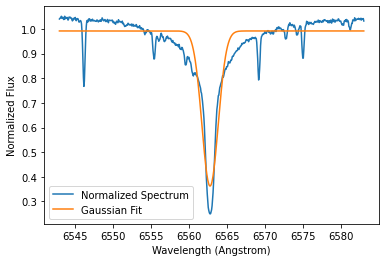

In [1]:
import matplotlib.pyplot as plt
from outsourced_code.spectrum_reader import read_spectrum
from outsourced_code.spectrum_normalizer import normalize_spectrum
from outsourced_code.radial_velocity_corrector import correct_radial_velocity
from outsourced_code.gaussian_fitter import fit_gaussian

def process_spectrum(filename, velocity_kms, initial_guess):
    """
    Processes the spectrum by reading it, normalizing the flux, correcting for radial velocity, 
    and fitting a Gaussian to the absorption line.

    Parameters:
    filename (str): The path to the spectrum file. The file should contain two columns for wavelength and flux.
    velocity_kms (float): Radial velocity shift in kilometers per second (km/s).
    initial_guess (list): List of initial guesses for the Gaussian fit parameters: 
                          [amplitude, center, width, offset].

    Returns:
    None
    """
    # Read spectrum
    wavelength, flux = read_spectrum(filename)
    
    # Normalize spectrum
    flux_normalized = normalize_spectrum(flux)
    
    # Correct for radial velocity
    wavelength_corrected = correct_radial_velocity(wavelength, velocity_kms)
    
    # Fit the Gaussian
    popt, gaussian = fit_gaussian(wavelength_corrected, flux_normalized, initial_guess)
    
    # Plot results
    plt.plot(wavelength_corrected, flux_normalized, label='Normalized Spectrum')
    plt.plot(wavelength_corrected, gaussian(wavelength_corrected, *popt), label='Gaussian Fit')
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Normalized Flux')
    plt.legend()
    plt.show()

# Example usage
initial_guess = [-0.5, 6565, 1.0, 1.0]
process_spectrum('data/example_spectrum.txt', 0, initial_guess)